# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




## 1. Importación de paquetes y dataset

Importación del dataset

In [7]:
import pandas as pd
import seaborn as sns

credit_applicants = pd.read_csv('credit-train.csv')
credit_applicants.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## 2.EDA y Visual EDA

In [8]:
# Comprobar si existen valores nulos 
credit_applicants.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [9]:
# Primera aproximación estadística de los datos de que disponemos
# Visualiza los parámetros estadíscos tipo de cada columna del dataframe:
# - Número de datos
# - Madia
# - Desviación estándar
# - Valor máximo
# - Valor mínimo
# - Percentiles
credit_applicants.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


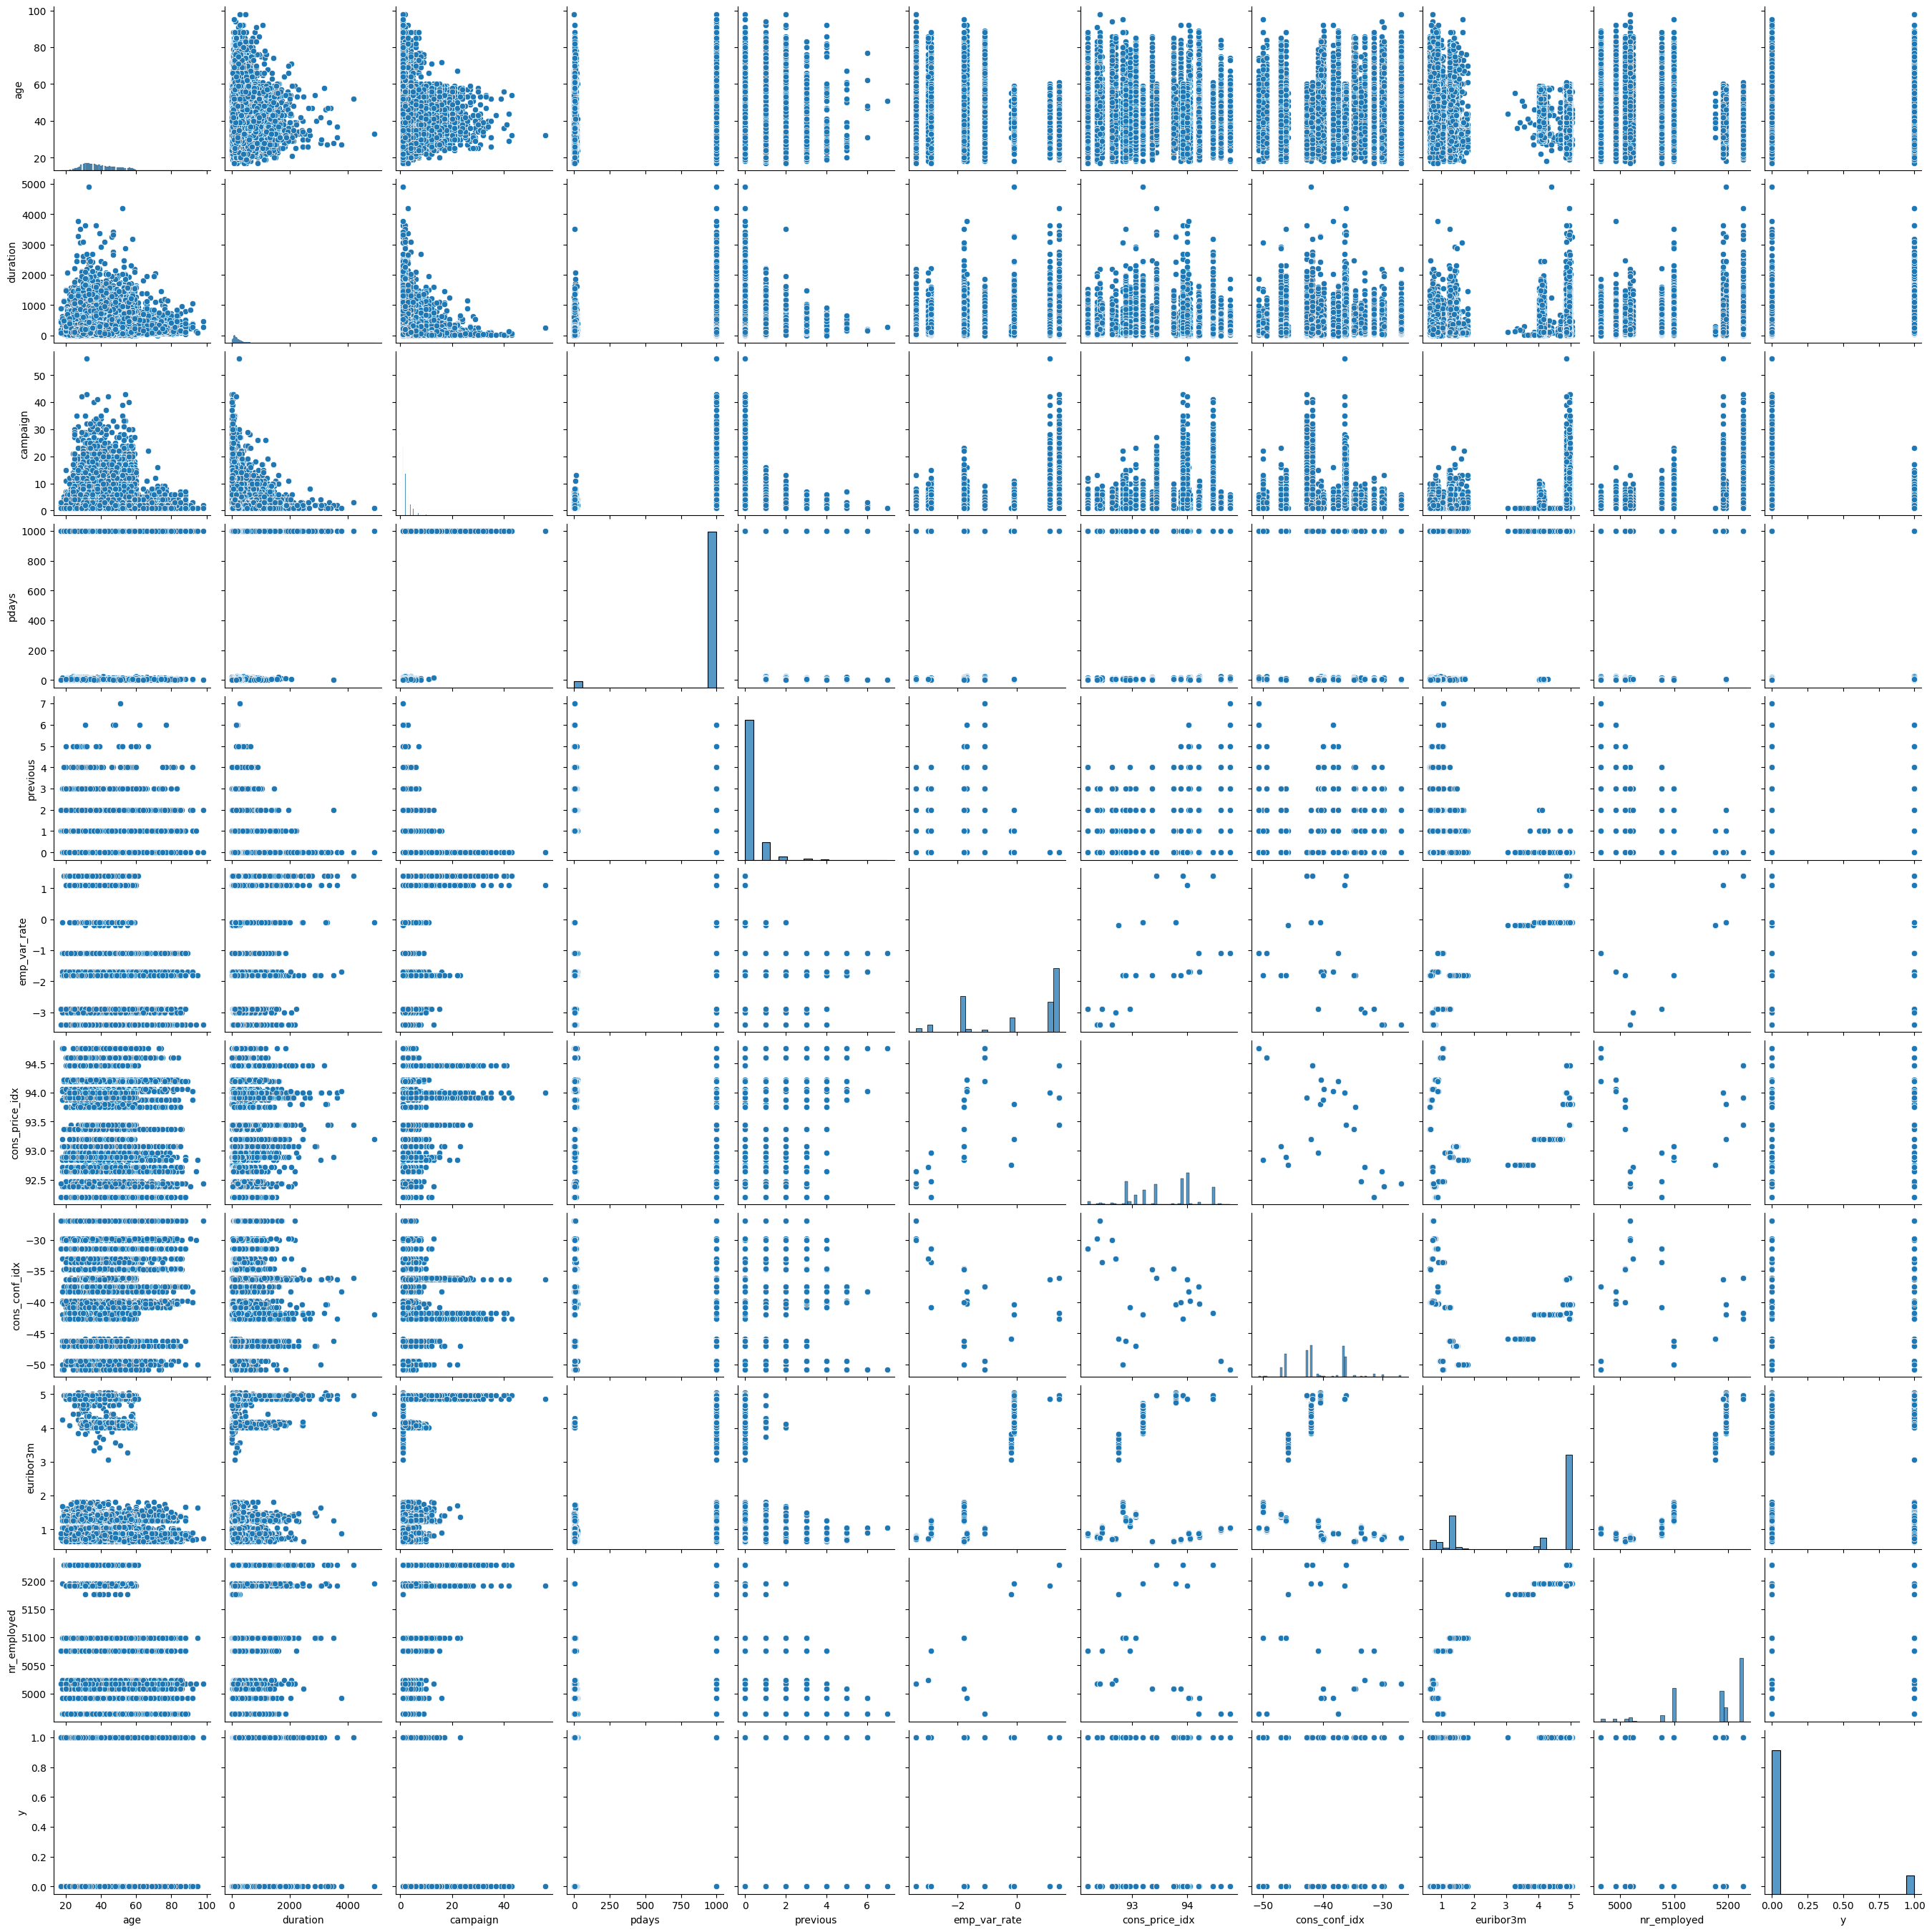

In [10]:
#Mostrar gráficamente relaciones entre columnas numéricas
sns.pairplot(credit_applicants)

## 3. Preprocessing data


## 4. Creación del modelo y división del dataset

## 5. Entrenamiento

## 6. Análisis de resultados

## 7. Realización de predicciones

## 8. Visualización